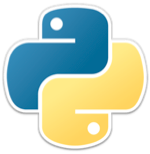


# Python Coding Club

This series is to introduce Python as a programming language to be used for data analysis, scientific computing and plotting. It is by __no means comprehensive__ but will provide a basis for further investigation and exploration into this powerful language. These notes are __best visualised__ in a __Jupyter Notebook__ and I encourage you to __follow along__ in your __preferred IDE__.

# Part 4: Functions

Part 4 of this series will cover one of the most useful aspects of any programming language; **functions**. I will go into detail about what they can be used for, how to define and call user generated functions and then I will explain more advanced concepts to do with functions that are also useful for more general usage.

Throughout this section, I have tried to include exercises that build upon the knowledge imparted in each section.

## Part 4.1 Defining functions
**Functions** are **reusable** pieces of code that can be used for specific purposes.

Concretely, function objects have a special `__call__()` method available to them, which causes them to execute some code when called. Any object that has a `__call__()` method can be used like a function. More on this when discussing classes.

Functions are **defined** using the `def` keyword then the **name of the function**. Functions are **typically** defined with parameters. Function names have similar rules as variable names, i.e. can be anything apart from starting with a number or containing spaces etc.

Once a function is **defined** using `def`, it can be **called** by typing the **function name and passing the appropriate number of arguments** or args to be used as parameters.

When calling or executing functions, the required number of arguments must be passed to the function otherwise an error will occur.

The usefulness of functions is that they can be called **multiple times** so that you avoid re-writing code.

This is extremely useful to perform multiple tasks. If you ever find yourself **copying and pasting large portions of code**, consider creating a function that executes the required code by simply calling that function back with the correct parameters.

**Parameters are the variables inside the function definition parentheses** whilst **arguments are passed to the function upon being called to set the parameters to**.


Here I will demonstrate a few function basics.
Executing the below cell saves the variable `printHello` as a function name but does not yet execute it.

In [1]:
def printHello(): # Function defined using 'def' then the function name. This function uses no parameters. 
    print("Hello")

In [2]:
print(type(printHello))

<class 'function'>


As you can see, the `class` of `printHello` is a function. The function itself does not take any **arguments** as no **parameters** are defined between the parentheses. <br><br> Also note the `:` after the function definition to start a code **block** of what to execute, denoted by the **whitespace indent**, similar to the code to execute after `if` statements or `for` or `while` loops. <br><br>We can now **call** the function.

In [3]:
printHello()

Hello


Typing the function name and passing the required number of arguments in the parentheses **calls** that function as shown above.

If we try to call the function with the incorrect number of **arguments** we get a `TypeError` informing us that the function takes `n` **arguments** but `m` were **passed** to the function.

In [4]:
printHello('Hey')

TypeError: printHello() takes 0 positional arguments but 1 was given

Functions are **called** by adding parentheses after the function name. 

Whereever in your code that a function has parentheses after the name (apart from in the function definition) the function **WILL** be called immediately. Therefore to otherwise reference the function, **do not** include the parentheses.

In [5]:
print(type(printHello())) # Note the parentheses after the function name.

Hello
<class 'NoneType'>


In [6]:
print(type(printHello))  # Here there are no parentheses, so the function does not get 'called'.

<class 'function'>


In the above code, the first section **calls** the `printHello()` function, which prints `Hello` as shown, and then the `type()` function evaluates the **type** of **object** **returned** by the `printHello()` function call. Since `printHello()` does not `return` anything it is a `None` **object** of `NoneType`. 

The second section does **NOT** actually **call** the `printHello()` function, instead it takes the function name (`printHello`) and evaulates the **type** of **object** that the name `printHello` refers to, in this case, a **function** object.

### Function 'Scope'

A useful concept to grasp is that of function **scope**. 

The function **scope** is the indented region below the function definition. 

Any variable created/assigned in the function's **local scope** is **NOT** available outside the function.

In [7]:
def func():
    var = 400
    print(var)
    
func()
print(var)

400


NameError: name 'var' is not defined

The above code shows that when `func()` is **called** it creates the variable `var` in the function's **local scope** which it then executes the `print()` function of that variable. 


Trying to call the `print()` function outside of the function **scope** on the variable `var` which belongs to the function causes a `NameError` as the variable `var` is **not defined** in the **global scope** (i.e. the rest of the program).

Global variables can be accessed from inside a function's **scope** however.

In [8]:
x = 'hello'     # Global variable defined in 'global' scope.

def printX():  
    print(x)    # Function references 'global' variable.

printX()        # Function call.

hello


Attempting to alter a global variable defined outside of the function definition and **not passed** to the function call as an **argument** or **arg** will not work as expected and will produce a `UnboundLocalError`.

In [9]:
x = 65

def add5():
    x += 5

add5()
print(x)

UnboundLocalError: local variable 'x' referenced before assignment

Looking at the above code, it would be expected that **calling** `add5()` will cause `x` to become `70`, however the scope of the function does not contain a variable `x` therefore calling this function is similar to referencing a variable that has not been assigned yet. 

This could be worked around by defining `x` as a `global` variable inside the function, which means it can be referenced in the **code block** without passing the variable as an **argument**.

In [10]:
x  = 65

def add5():
    global x
    x += 5

add5()
print(x)

70


The above now works as expected. It takes the `global` variable `x` and then adds 5 to it. When we call `add5()` (with **no arguments**) `x` then is increased by 5, upon calling the `print(x)` with `x` as an **argument** it then prints the new value of `x`. 

Having the **same name in local scope** of a function and **global scope** will cause the function to use the local variable.

In [11]:
X = 'X'

def func():
    X = 'y'     # Essentially assigning local variable 'X' to a value of 'y'.
    print(X)    # Printing that local variable.

func()          # Calling the function to execute it.
print(X)        # Printing the global variable 'X'.

y
X


Global variables can also be made using the `global` keyword from inside function scope.

In [12]:
def f():
    global variable
    variable = 45

f()
print(variable+5)

50


This then allows the use of the variable outside of the function scope.

However, using `global` variables in this way is highly frowned upon as it can be very messy working with multiple variables all in the global scope. 

Ideally, a function should only utilise what is **passed** to it as **arguments**.

This is achieved by defining a function with **parameters** by placing parameters between the parentheses when defining the function and using the `return` keyword to produce a new value. We can then reassign `x` to this returned value.

**Parameters** are local variables used **only inside the function** and therefore have no value outside of the function **scope**.  

In [13]:
x = 85  # Setting variable x to 85.

def add5(p):    # Defining 'add5' with the parameter 'p'.
    p += 5      # Parameter 'p' is assigned to itself + 5. 
    return p    # This 'returns' a value from the function.

print(x)        # Value of 'x' before the 'add5' is executed.
x = add5(x)     # Executing 'add5(x)' with 'x' as the argument and assigning the 'returned' value to the variable 'x'.
print(x)        # New value of 'x'.

85
90


This is a more **pythonic** way of using functions since it does not directly interfere with any `global` variables and simply uses what has been **passed** to it.

However when simply using a variable defined in the **'global scope'** (i.e. simply in the program not inside a function) the variable can still be **accessed** just not **altered**. 

Assigning a variable to a function **call** that does not return a variable will cause the variable to be assigned to `None`.

In [14]:
def new_func(x):  # Function defined with parameter 'x'.
    print(x)      # This function calls the 'print()' function with the variable 'x' as an argument.

y = 'Hello'
z = new_func(y)   # This line calls the 'new_func()' function, which then prints the argument 'y' but returns nothing.
print(z)          # Therefore 'z' is assigned to 'None' and printing 'z' will show 'None'.

Hello
None


In the above code, since `new_func` does not contain the `return` keyword, it simply **returns** `None`. As such, any variable assigned to the function call will be set to `None`. 

### Exercise 4.1: Globals

#### i).

Here we will write a function to access a `global` variable `x` and `print()` the value of that variable squared.

Confirm that the function works for any value of `x` by changing the value assigned to `x` at the top and executing the cell again. 

**Hint**: This requires the use of the `global` keyword to access the `x` variable.

In [ ]:
x = 12

def squareX():
#-------------------------------------------------------------------------
# YOUR CODE HERE




#-------------------------------------------------------------------------

squareX()

#### ii).

Now alter the function to take a parameter `p` and have the function print `p` squared. Call the function with `x` passed as an **argument** to show the result. Confirm the result is the same as before.

**Hint**: Make sure to include `p` as a parameter in the function defintion and to call the function with the argument `x`.

### Exercise 4.2: Global lists

Write a function that takes no arguments in the section below to take the global variable `var_list` and multiply each element by 2.

**Hint**: Here we will be showing the use of the `global` keyword to access the global variable `var_list` inside the function scope, as well as `for` loops to access the elements of `var_list`. You might consider using the `range()` and `len()` functions for accessing elements of the `var_list`.

In [ ]:
var_list = [32, 4, 13, 53, 65, 2]

def elementMultiply2():
#-------------------------------------------------------------------------
# YOUR CODE HERE






#-------------------------------------------------------------------------

elementMultiply2()                # Calls function defined above.
print(var_list)                   # Check to show that 'var_list' is the same as the list below (desired output).
print([64, 8, 26, 106, 130, 4])   # Desired output.

As with **exercise 4.1**, changing the values in `var_list` and calling the `elementMultiply2()` function should alter the new `var_list` which can be shown upon calling `print(var_list)`.

### Return keyword

The `return` keyword is used when a function is to **return** or **output** an **object**. This can then be used for variable assignment.

In [16]:
def f():
    x = 43
    y = 23
    return x*y

f()

989

Calling the function here simply executes the function but since the `print()` function has not been invoked, the value does not **print** (in jupyter notebooks the output of the function call will be shown but on an IDE calling the function will not *print* anything).

The value can then be used for assigning a variable etc.

In [17]:
y = f()     # Output or 'returned' object of 'f()' is assigned to y.
print(y-9)  # Printing the value of y-9.

980


Conversely, if the function instead used `print()`:

In [18]:
def f2():
    x = 43
    y = 23
    print(x*y)    # Now prints (x*y) rather than returns.

f2()              # This calls f2(), invoking the print function.
y = f2()          # This also calls f2() immediately, invoking the print function, but returns nothing so y == None.
print(y)          # This prints y, which has a value of 'None'.

989
989
None


The function call to `f2()` causes `x*y` to print, then calling the function in the line `y = f2()` invokes the function call again, causing `x*y` to print. As `f2()` does not return anything, `y` is assigned to `None`.

The `return` keyword can also allow for a function to return multiple values.

In [19]:
def func():
    x,y = 400,700
    return x, y

output = func()
print(output)

(400, 700)


These can be either accessed or unpacked as with accessing and unpacking `tuple` objects in Part 3.

In [20]:
n, m = func()
print(n)
print(m)
print(output[0])
print(output[1])

400
700
400
700


Therefore the `return` keyword is used extensively to set variables equal to the output of a function, rather than simply printing them to the console.

### Parameters

As briefly touched on before, **parameters** are defined as **local variables** that the function uses as shown below.

In [21]:
y = 84

def divisibleBy2(p): # Defining a 'parameter' for the function as local variable 'p'. 
    if p%2 == 0:     # This variable is local to the function itself and has no value outside of the function 'scope'.
        print('Yes')  # Test for divisibilty of p.
    else:
        print('No')

divisibleBy2(y) # Calling the divisibleBy2 function with variable 'y' assigned to the parameter 'p'.

Yes


Calling `divisibleBy2()` with `y` as the **argument** causes the parameter `p` to be set to the `y` variable which then executes the function.

The **parameter** `p` has no value outside of the function definition, this is what is meant by the **scope** of a function. 

Multiple parameters can be defined in a function definition by separating them with a comma.

In [22]:
def print_params(p1, p2):   # Parameters separated in the function definition by a comma. 
    print(f'p1: {p1}')
    print(f'p2: {p2}')

print_params(54, 'hello')
print_params('this is p1', 'this is p2')

p1: 54
p2: hello
p1: this is p1
p2: this is p2


In the above lines, the function has been defined with two parameters with a comma separating them.

It then gets called with different values for `p1` and `p2`, again separated by a comma when calling the function.

Calling the function with the incorrect number of **arguments** or **args** results in a `TypeError`.

In [23]:
print_params(65)

TypeError: print_params() missing 1 required positional argument: 'p2'

This `Error` explains that the function **call** is missing 1 **arg** which it would assign to `p2`. 

The '**positional**' part of the `Error` means that the argument for `p2` would be assigned after `p1` if the arguments are separated by a comma. 

Functions with parameters can also be called by assigning the parameter name directly to a value/variable. These types of arguments are called **keyword arguments** or **kwargs** and have a similar syntax to dictionaries.

In [24]:
print_params(p1='hello', p2='This is p2')

p1: hello
p2: This is p2


In calling the function this way, the **position** of the arguments is not taken into account, therefore the following code outputs the same as above.

In [25]:
print_params(p2='This is p2', p1='hello')

p1: hello
p2: This is p2


Assigning a **kwarg** that is not listed results in a `TypeError`. This shows that `p3` is an unexpected kwarg that has been passed to the function. 

In [26]:
print_params(p1=43, p3=45)

TypeError: print_params() got an unexpected keyword argument 'p3'

The `*` or **splat** operator can be used to pass a list of arguments to the function positionally in the same order as they appear in the list.

The splat operator **unpacks** the list and places the **args** the correct positional order.

In [27]:
params_list = [56, 'apples']
print_params(*params_list)

p1: 56
p2: apples


Similary parameters can be unpacked from a dictionary of named parameters called keyword arguments or kwargs. To unpack the parameter dictionary, a double `**` operator is used. In this way, `p1` in the function gets assigned to the value of the key `p1` in the `param_dict`, the same is true for `p2`.

In [28]:
param_dict = dict(p1=43, p2="hello")
print_params(**param_dict)

p1: 43
p2: hello


Trying to utilise both positional and keyword arguments for the same **parameter** results in a `TypeError` as **positionally** `p1` is the first parameter, and gets assigned the value of `34` but then by writing `p1='hello'` it also receives a value of `hello` and therefore gets assigned too many values.

In [29]:
print_params(34, p1='hello')

TypeError: print_params() got multiple values for argument 'p1'

However, calling the positional **args** in the right order and specifiying any other by name is valid.

In [30]:
print_params(34, p2='hello')

p1: 34
p2: hello


When calling the function, positional arguments **must** come first otherwise a `SyntaxError` is raised, this essentially means that Python does not know which **parameter** to assign the **positional argument** to.

In [31]:
print_params(p2='hello', 34)

SyntaxError: positional argument follows keyword argument (<ipython-input-31-e5f4d99cd7cb>, line 1)

#### Default parameters

Functions can also be defined with **default** parameters. These are parameters with a specific value that can be altered. 

To create default values for parameters, include the parameter name and an equals sign.

In [32]:
def func_default(x, y, z=0):  # Here the parameter 'z' is assigned the default value of 0.
    return x + y + z

print(func_default(1,2,3))  # Calling the function with 3 parameters assigns 'x' = 1, 'y' = 2, 'z' = 3.

6


The above function assigns the parameter `z` to the value `3` by specifying it in the **call**, however when leaving it out:

In [33]:
print(func_default(3,4))

7


This calls the function but with the default value of `z == 0`, therefore returning `3 + 4 + 0 == 7`. 

This can be the case for **all** parameters if required, for instance.

In [34]:
def func_default2(x=5, y=7, z=10):
    return x*y*z

print(func_default2())              # Uses default values.
print(func_default2(4, z=10, y=1))  # Uses specified values.

350
40


This means that `func_default2()` can still be called even without any positional arguments. However if the **args** are specified, (in this case from a positional **arg** for `x` and **kwargs** for `z` and `y`), then the function uses those values instead. 

However when creating a function, non-default valued parameters must come before default valued parameters.

In [35]:
def func2(x=6, y, z):
    print(x, y, z)

SyntaxError: non-default argument follows default argument (<ipython-input-35-3d509f925be6>, line 1)

### Exercise 4.3: Element multiply, parameters.

Now alter the function similar to **exercise 4.2** to take the list as a parameter and execute the same code (i.e. multiplying elements by 2) but **only** if the **element** of the `list` is less than the **average** of all the elements in the list.

**Hint**: This exercise will utilise the **pythonic** way of altering variables via passing **arguments** to the function and returning a value using the `return` keyword.

In [ ]:
var_list2 = [32, 4, 13, 53, 65, 2]

#-------------------------------------------------------------------------
def elementMultiply2():  # Remember to include a parameter in the function definition for the 'list' passed.
# YOUR CODE HERE






#-------------------------------------------------------------------------

var_list = elementMultiply2(var_list) # Calls function defined above.
print(var_list)                       # Check to show that 'var_list' is the same as the list below (desired output).
print([64, 8, 26, 106, 130, 4])   # Desired output.

**Hint**: Using either `range()` or `enumerate()` could come in useful here, where:

In [36]:
list_num = [3,4,5,6]
print(list(range(0, len(list_num)))) # Produces range from 0 to length of list, non-inclusive in steps of 1.
print(list_num)                      # Simply prints list.
print(list(enumerate(list_num)))    # Prints list of 'zipped' index of element with element of list as tuples. 
for index, element in enumerate(list_num):   # Iterates and unpacks the enumerator.
    print(index, element)

[0, 1, 2, 3]
[3, 4, 5, 6]
[(0, 3), (1, 4), (2, 5), (3, 6)]
0 3
1 4
2 5
3 6


### Exercise 4.4: Default parameters

The objective of this exercise is to produce a function that **returns** the following:

> $(x+y)^{3}$

For parameters `x` and `y` where the default value for `y` is `0` and hence returns $x^{3}$.

**Hint**: the expansion of $(x+y)^{3}$ is equal to $y^{3}+3xy^{2}+3yx^{2}+x^{3}$.

In [ ]:
num1, num2 = 5, 9 

def cubicExpansion(): # Do not forget to include parameters here.
#-------------------------------------------------------------------------
# YOUR CODE HERE
   

#-------------------------------------------------------------------------

print((num1+num2)**3)
# PRINT THE OUTPUT OF YOUR FUNCTION HERE
# With num1 and num2 as arguments.


print((num1+0)**3)
# PRINT THE OUTPUT OF YOUR FUNCTION HERE
# With num1 as an argument.


print((1+0)**3)
# PRINT THE OUTPUT OF YOUR FUNCTION HERE
# With no arguments.


print((1+num1)**3)
# PRINT THE OUTPUT OF YOUR FUNCTION HERE
# With the kwarg assigning y to num1.


The outputs should match those above typed out.

### Arbitrary number of parameters

#### Multiple positional arguments

Functions can also be defined with an arbitrary number of parameters, this is denoted by a parameter having an `*` before it in the function definition. The parameter **can** be named whatever you would like but almost universally, the name given is `*args`. This is useful as other programmers can better understand what you are doing.

In [37]:
def multiply(*args): # arbitrary number of positional arguments denoted by '*args'. 
    result = 1
    for arg in args:    # loop through the arguments passed.
        result *= arg   # adds all the arguments together.
    return result
    
z = multiply(3,4,5,6)   # Passing multiple arguments as 'args'.
print(z)
print(3*4*5*6)      

360
360


In the above function we take each value passed to `multiply` and multiply them all together. 

Any number of `args` can be passed into `multiply` now and it shall multiply all of them together.

Normal positional arguments can be used alongside `*args`.

In [38]:
def multiply_plus_x(x, *args):
    result = 1
    for arg in args:
        result *= arg+x
    return result

z = multiply_plus_x(5, 6, 5, 3, 2)
print(z)

result = 1
for arg in [6,5,3,2]:
    result *= 5+arg
print(result)

6160
6160


The above code effectively takes the first positional argument `5` as `x` and then for each of the `args` (= `6, 5, 3, 2`) multiplies the `result` by `arg+5` for each `arg`. 

Named keyword arguments **HAVE** to follow `*args` in a function otherwise they will be overwritten, for instance:

In [39]:
def f(x, y=4, *args):
    print(args)
    print(y)

f(4, 5, 6, 3, 1)

(6, 3, 1)
5


In [40]:
def f(x, *args, y=4):
    print(args)
    print(y)

f(4, 5, 6, 3, 1)

(5, 6, 3, 1)
4


Now in the second code snippet, to actually assign `y` to a value, a **kwarg** must be used, for instance:

In [41]:
f(4, 5, 6, 3, 1, y=8)

(5, 6, 3, 1)
8


Once again, calling the function with a **kwarg** before any positional **args** will result in a `SyntaxError`.

In [42]:
f(y=4, 5, 6, 3, 1)

SyntaxError: positional argument follows keyword argument (<ipython-input-42-92f17e1ec503>, line 1)

#### Multiple keyword arguments

To provide a function with multiple keyword arguments, a similar thing can be implemented using the `**` operator on a parameter (typically this parameter is called `**kwargs` to make it more readable from programmer to programmer).

In [43]:
def print_kwargs(**kwargs):
    print(kwargs)
    for k, v in kwargs.items():
        print(f'{k}: {v}')

print_kwargs(apple='5', carrot='10', blueberry='15')

{'apple': '5', 'carrot': '10', 'blueberry': '15'}
apple: 5
carrot: 10
blueberry: 15


As you can see, `**kwargs` gets passed into the function as a dictionary, which can then either be iterated through or tested for using `if` statements.

If you have specific kwargs to look out for, it is worth writing them in as 'default values' or using a test.

In [44]:
def print_type(**kwargs):
    valid_kwargs = ['type', 'x', 'y']
    for key in kwargs:
        if key not in valid_kwargs:
            raise TypeError(f"{key} is not a valid keyword argument, valid kwargs are: {', ' .join(valid_kwargs)}")
        else:
            print(f'{key}: {kwargs[key]}')
        
print_type(type=67)

type: 67


In [45]:
print_type(hello=57)

TypeError: hello is not a valid keyword argument, valid kwargs are: type, x, y

Here we have used the `raise` keyword to `raise` an `Exception` or an `Error`, in this case a `TypeError` saying that `hello` is not a valid kwarg to pass into kwargs. 

This could just as easily be done by defining the function with specific kwargs in mind.

In [46]:
def print_kwarg(type=None, x=None, y=None):
    kwargs = {'type': type, 'x': x, 'y': y}
    for key in kwargs:
        if kwargs[key]:
            print(f'{key}: {kwargs[key]}')

print_kwarg(type='hello')

type: hello


In [47]:
print_kwarg(carrot=35)

TypeError: print_kwarg() got an unexpected keyword argument 'carrot'

This has a similar error message popping up telling the user that the keyword argument passed is not valid/is unexpected.

Multiple kwargs must be defined **after** any named kwargs in the function definition.

In [48]:
def func(**kwargs, x=None):
    print(kwargs)
    print(x)

SyntaxError: invalid syntax (<ipython-input-48-3f834e35c0aa>, line 1)

In [49]:
def func(x=None, **kwargs):
    print(kwargs)
    print(x)

func()

{}
None


### Exercise 4.5: Polynomial with coeffecients

The aim of this exercise it to make a function that produces a polynomial of `x`, for instance:

> $a_{0} + a_{1}x + a_{2}x^{2} + a_{3}x^{3} + ... + a_{n}x^{n}$

for `n` number of coeffecients. 

#### i).

Firstly, write a function that takes both a single variable (`x`) and a `list` or `tuple` as an argument for the coeffecients. The function should accept **any length** of the list of coeffecients passed and output the resulting value of the polynomial for the `x` value with the corresponding `coeffs`.

In [ ]:
x = 3
coeffs = [0,0,1]
coeffs2 = [1,3,2,1,1,1]
#-------------------------------------------------------------------------
def polynomial(): # Make the function take `x` and coeffecients as arguments.
#YOUR CODE HERE (remember to indent and use whitespace for the function block).




#-------------------------------------------------------------------------

y = polynomial(x, coeffs)  # Should produce `x**3`
print(y)
z = polynomial(x, coeffs2) # Should output 1 + 3x + 2x**2 + x**3 + x**4 + x**5 == 379
print(z)

#### ii).

Now alter the function to take an arbitrary number of `args` instead of a list for the coeffecients, i.e. by using the `*` operator.

This function should take `x` and an **arbitrary number** of coeffecients as **arguments** and produce a polynomial in `x` starting at $x^{0}$ up until the last passed non-zero coeffecient.

This function should return the value of the polynomial with the given coeffecients.

In [ ]:
x = 3
coeffs = [0,0,1]
coeffs2 = [1,3,2,1,1,1]

#-------------------------------------------------------------------------
def polynomial(): # Make the function take `x` and coeffecients as arguments.
#YOUR CODE HERE (remember to indent and use whitespace for the function block).





#-------------------------------------------------------------------------

y = polynomial(x, 0, 0, 1)  # Should produce `x**3`
print(y)
y = polynomial(x, *coeffs)  # Unpack the list into positional parameters with '*' in call.
print(y)
z = polynomial(x, 1, 3, 2, 1, 1, 1) # Should output 1 + 3x + 2x**2 + x**3 + x**4 + x**5 == 379
print(z)
z = polynomial(x, *coeffs2) # Unpack the list into positional parameters with '*' in call.
print(z)

**Hint**: It may come in handy to use the `range()` and `len()` functions when writing the code. Also keep in mind the `+=` operator reassigns a variable to itself **plus** a new value. Bare in mind that `*args` are passed as a tuple to the function, therefore tuple accessing is required to get individual arguments.

Test your function behaves as you expect it to by altering the value of `x` or the number of coeffs in either the coeffs list or by calling `polynomial()` with varying numbers of positional arguments. 

## Part 4.2: Calling functions from functions

It is possible to **call** functions from other functions. This has already been demonstrated above, where in some of the functions I have defined, the function actually **calls** the in-built `print()` function with a various number of arguments all separated by a comma (i.e. the print function takes `*args` as a parameter). 

This can also be used with user-defined functions of course.

In [50]:
def test_if_even(x):     # Function to test if a number is even or odd.
    if x%2 == 0:
        return True      # Returns the bool value 'True' if even otherwise returns 'False'
    else:
        return False
    

def find_even_nums(num_list):
    even_list = []
    for num in num_list:        # Iterates through the numbers in the num_list
        even_list.append(test_if_even(num))    # Appends the returned value from 'test_if_even()' function call.
    return even_list            # Returns bool list. 
 
list_of_nums = [9,8,10,3,5,7,89]
new_list = find_even_nums(list_of_nums)

print(new_list)

[False, True, True, False, False, False, False]


In the above code, the function `find_even_nums()` **calls** the function `test_if_even()` on each element of the `num_list` parameter and then returns the result. 

This could be written all in one go, but we could also now add the function object as a parameter.

In [51]:
def iterate_append(a_list, func):
    result_list = []
    for el in a_list:
        result_list.append(func(el))
    return result_list

list1 = iterate_append(list_of_nums, test_if_even)
print(list1)

[False, True, True, False, False, False, False]


As you can see, the function `iterate_append()` produces the same result when passed the same list and specifiying the `test_if_even` function as the `func`. Note that this works because `test_if_even` is a **function object** and therefore it has a `__call__()` method meaning it can be **called** or that it is **callable**. 

If we were to pass an object that **does not have a call method** then we will get a `TypeError`.

In [52]:
list2 = iterate_append(list_of_nums, list1)
print(list2)

TypeError: 'list' object is not callable

This is saying that a `list` object does not have the `__call__()` method required to execute the line `result_list.append(list1(el))` as the `list1` object cannot be **called**. 

The built-in function `callable()` evaluates whether an object **can** or **cannot** be called by returning `True` or `False` accordingly.

In [53]:
print(callable(list1))
print(callable(iterate_append))

False
True


This gives information on what **objects** have a `__call__()` method.

The more general form of `iterate_append()` can now allow us to use a different function instead of `test_if_even()` for instance.

In [54]:
def multiplyBy10(x):
    return x*10

print(iterate_append(list_of_nums, multiplyBy10))

[90, 80, 100, 30, 50, 70, 890]


This means the function is much more general for something we would like to do.

However for operations involving applying a function to each element of an iterator, the built-in function `map()` can already do this.

`map()` takes two arguments, the first is a **callable object** or a function, and the second is an **iterator** or **iterable** object. It returns a `map` **object** and therefore to view the result we can convert it to a list by using the `list()` constructor.

In [55]:
print(list(map(multiplyBy10, list_of_nums)))
print(list(map(test_if_even, list_of_nums)))

[90, 80, 100, 30, 50, 70, 890]
[False, True, True, False, False, False, False]


As you can see this produces the same result as our above function. 

The main takeaway from this section is that a user-defined function can **call** other user-defined functions. In fact any function in the **global** scope is still a **global** variable and therefore can be directly accessed by a function's **local scope** if required, or a **callable** object can be passed into a function to **call** that object if required. 

## Part 4.3: Functions defined inside functions

An **inner** function can also be defined within the **local scope** of a function by including a `def` keyword inside the function block:

In [56]:
def expand(x, y):          # Define outer function with parameters `x` and `y`. 
    def expand_degree(z):  # Define inner function with parameter `z`.
        h = (x + y)**z     # Create expansion of degree `z`.
        return h           # Return that expansion.
    return expand_degree   # Return the inner function as an object.

an_expansion = expand(3, 0)   # This calls the outer function 'expand()' which returns the inner function 'expand_degree()'
print(an_expansion(3))     # Since 'an_expansion' has been assigned to expand_degree(), it returns 'h'.

27


This might look complicated at first, but essentially it boils down to the fact that the outer function **returns the inner function** but with `x` and `y` initialised to the values given when then outer function was **called**. 

This means that `an_expansion` is actually a **callable** function, i.e. it is actually `expand_degree()` where the `x` and `y` values are equal to `3` and `0` respectively. 

To show that `an_expansion` is actaully a **callable** object, we can use `callable()`.

In [57]:
print(callable(an_expansion))

True


### Exercise 4.6: Polynomial with initialised coefficients

In the previous exercise with polynomials, we have to call the `polynomial` function with the correct coeffecients each time in the function call. 

In this exercise, we will use the fact that a function can be defined in a function to initialise the coeffecients for a given polynomial and then call that function with various values of `x` to evaluate.

The workflow should go similar to this:

- Make outer function take coeffecients as arguments (varying number of coeffecients).
- Make inner function take `x` as an argument.
- Inner function should return the polynomial of the coeffecients multiplied by `x` in a similar way as before.
- Outer function should return the inner function.

In [ ]:
x = 3

coeffs = [0,1,4,3,2]    # Different lists of polynomial coeffecients
coeffs2 = [9,1,0]

#-------------------------------------------------------------------------
def polynomialModel():     # Make sure to include the coeffs as parameters.
    def p_evaluate():  # Make sure to include `x` as a parameter.
    #YOUR CODE HERE





#-------------------------------------------------------------------------

p1 = polynomialModel()    # UNPACK coeffs LIST AS ARGS USING *.
p2 = polynomialModel()    # UNPACK coeffs2 LIST AS ARGS USING *.

#-------------------------------------------------------------------------

print(p1(x))      # Print evaluation of polynomials for 'x'.
print(p2(x))      


x_list = [1,2,3,4,5]     # Multiple 'x' values.

#-------------------------------------------------------------------------

p1_x = list(map())  # Use map to evaluate p1 for each value in x_list.
p2_x = list(map())  # Use map to evaluate p1 for each value in x_list.

#-------------------------------------------------------------------------

print(p1_x)       # Print evaluation of p1 and p2 with each x in x_list.
print(p2_x)       

### Exercise 4.7: Mean sum of squared errors

In this exercise we will be doing a similar outer-inner function program to calculate the mean sum of squared errors or squared residuals for a function given some `x` and `y` data. 

This is useful to gauge how well a model $h(x)$ fits data. 

The equation for the mean sum of squared errors is:

> $R = \frac{1}{N} \sum\limits_{i=0}^N (y_i-h(x_i))^2$

Where $h(x)$ is a model function, $x$ is x data and $y$ is the observed value. Of course, the closer the prediction $h(x_i)$ is to the observed value $y_i$ the closer $R$ will be to zero, meaning that the model function $h(x)$ has fit the data well. 

In this exercise therefore, we will define a linear function to fit the `x` and `y` data. By simply looking at the values, it is clear that an equation of:

>$h(x) = 2x + 0$

would fit the data quite well, therefore we would expect to retrieve a low number back from the meanSquareError function for $m = 2$ and $c = 0$ and higher for different values.

For this exercise, there could be many ways to sort the **inner and outer function parameters**. 

For instance, the **outer function** parameters could be the type of $h()$ function as a parameter as well as its corresponding `*args` (i.e. $m$ and $c$). The **inner function** could then take the datasets $x$ and $y$ as parameters. This would allow testing the same model on multiple datasets, since once the model has been initiated with $h()$ and its `*args`, different `x` and `y` data could be passed into the same model. 

Alternatively, the outer function could take the `x` and `y` datasets and then the inner function could take a different $h()$ and different `*args`. This would allow the meanSquareError for the same dataset to be computed for various models $h()$ or `*args` (i.e. different $m$ and $c$ values in this case).

In summary:

1. **Outer function** takes (`func`, `*args`) arguments and **inner function** takes (`x`, `y`) --> provides testing **same model** on **different datasets**.
2. **Outer function** takes (`x`, `y`) arguments and **inner function** takes (`func`, `*args`) --> allows testing **different models** on **same dataset**. 

For this exercise I would like you to **implement type 2**, therefore we can test **different linear models** on the **same dataset** to see how well fit they are.

#### i). 

For this first part, write a linear function taking (x, m, c) as parameters. Then write a `meanSquareError` function that takes `x` and `y` as parameters and returns the inner function `evaluate()`. Let `evaluate()` take a function or `func` as a parameter as well as `*args`. Then have `evaluate()` return the `R` or mean squared error. 

**Hint**: Have `evaluate()` pass `*args` to the `func` function when evaluating the $y_i-h(x_i)$ part for $h(x_i)$. The use of a `for` loop to iterate over the sum is very useful.

**Hint**: This can be tricky, make sure to first put the correct parameters for both inner and outer functions, then for the outer function, have it `return` the inner function, and have the inner function actually compute the mean squared error. If the outer function takes all the parameters in, you will have to call the outer function with all the parameters in one go, which gives no benefit from a single function on its own.

In [ ]:
def linear(x, m, c):
#-------------------------------------------------------------------------
# RETURN A LINEAR FUNCTION.
    
#-------------------------------------------------------------------------
def meanSquareError(x, y):  
    def evaluate(func, *args):  # Remember whitespace and the number of 'return' keywords.
# YOUR CODE HERE
       
    
    
    
    
    
    
#-------------------------------------------------------------------------

# Dataset
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.0, 2.2, 3.9, 5.7, 8.2, 10.9, 12.1, 15.0, 16.5, 19.0, 21.0]

mse = meanSquareError(x, y)  # Return the evaluate function using the 'x' and 'y' dataset.

print(mse(linear, 2, 0))     # Compute the mean square error for a linear function of m = 2, c = 0.
print(mse(linear, 1, 0))     
print(mse(linear, 2, 5))
print(mse(polynomial, 0, 2)) # Note polynomial function with args 0, 2 should be exactly the same as linear(2, 0)
                             # if your polynomial function is correct.

#### ii). 

For this second part, change `meanSquaredError` to take a model `h` instead. For this part, the function `linearModel` will have an outer and inner function, similar to `polynomialModel` in exercise 4.6.

Due to this, we do not necessarily need to make `meanSquaredError` contain a function inside a function and can instead have `meanSquaredError` take `x`, `y` and `h` as arguments where `h` is the model to compute. Much of the code for evaluating the squared error is the same as before, except now we can define linear models as `l1`, `l2`, etc. and pass them into the `meanSquaredError` function to evaluate that model on the `x` and `y` datasets.

In [ ]:
#-------------------------------------------------------------------------
# RETURN A LINEAR MODEL.

def linearModel(m, c):
    def linearModelCompute(x):

    

#-------------------------------------------------------------------------
# MEAN SQUARE ERROR.

def meanSquareError(x, y, h):      

    
    
    

#-------------------------------------------------------------------------

# DATASET
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.0, 2.2, 3.9, 5.7, 8.2, 10.9, 12.1, 15.0, 16.5, 19.0, 21.0]

l1 = linearModel(2, 0)
l2 = linearModel(1, 0)
l3 = linearModel(2, 5)
p1 = polynomialModel(0, 2)

print(meanSquareError(x, y, l1))
print(meanSquareError(x, y, l2))
print(meanSquareError(x, y, l3))
print(meanSquareError(x, y, p1))  # Note polynomial model with args 0, 2 should be exactly the same as linear(2, 0)

#### iii).

Part iii). involves implementing part ii).'s code but utilising a list comprehension instead of a `for` loop to calculate `R`. List comprehensions appeared in Python Coding Club Part 3.

Instead of using a `for` loop try to define `R_list` as a list of squared residuals. Then simply find `R` as `sum(R_list)/len(R_list)`.

In [ ]:

#-------------------------------------------------------------------------
# MEAN SQUARE ERROR.

def meanSquareError(x, y, h):      # This is type 2, i.e. can apply different functions to the same dataset.



#-------------------------------------------------------------------------

# DATASET
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.0, 2.2, 3.9, 5.7, 8.2, 10.9, 12.1, 15.0, 16.5, 19.0, 21.0]

l1 = linearModel(2, 0)
l2 = linearModel(1, 0)
l3 = linearModel(2, 5)
p1 = polynomialModel(0, 2)

print(meanSquareError(x, y, l1))
print(meanSquareError(x, y, l2))
print(meanSquareError(x, y, l3))
print(meanSquareError(x, y, p1))  # Note polynomial model with args 0, 2 should be exactly the same as linear(2, 0)

#### iv). 

Part iv). of this exercise involves building on part ii).'s code using the same model based evaluations but this time instead of using a `for` loop, utilising the `map()` function to map a function to each element of an iterable.

**Hint**: Using the `map()` function involves the first argument to be a function that takes `m` arguments, whilst the subsequent arguments to `map()` should be iterables. If the function takes `m` arguments, there should be `m` iterables/lists, map will then take each element of each list and pass them as arguments to the function argument.

For instance:

for
$x = [x_0, x_1, x_2,..., x_n]$, $y = [y_0, y_1, y_2,..., y_n]$, $z = [z_0, z_1, z_2,..., z_n]$
and $f(x, y, z)$

then `h = map(f, x, y, z)` makes a list of $h = [f(x_0, y_0, z_0), f(x_1, y_1, z_1), ..., f(x_n, y_n, z_n)]$

**NOTE** the first argument to `map()` is always the **callable** function. 

**Hint**: It may be useful to define a **square error** function that returns $(y-y_{predict})^2$ for $y_{predict} = h(x)$.

In [ ]:
#-------------------------------------------------------------------------
    
def squareError(y, y_pred):
    
    

#-------------------------------------------------------------------------

def meanSquareError(x, y, h):
    
    
    
    
#-------------------------------------------------------------------------
# DATASET
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.0, 2.2, 3.9, 5.7, 8.2, 10.9, 12.1, 15.0, 16.5, 19.0, 21.0]

l1 = linearModel(2, 0)
l2 = linearModel(1, 0)
l3 = linearModel(2, 5)
p1 = polynomialModel(0, 2)

print(meanSquareError(x, y, l1))
print(meanSquareError(x, y, l2))
print(meanSquareError(x, y, l3))
print(meanSquareError(x, y, p1))

**Summary**: This exercise had many parts and was quite long, but the point is there are **many ways to achieve the same result**. Mainly it comes down to **if your functions need to interface with any other functions** but otherwise it is **simply personal preference** or **speed** (some implentations may be quicker than others, research will be required for figuring out which implementation is quicker). 

Hopefully seeing some of the ways that this same exercise can be approached will open your horizons on **how to approach different problems** both with **function design** and actual **implementation**. 

## Part 4.4: Lambda functions

Lambda functions are simple, quick, one line functions implemented using the `lambda` keyword. 

Lambda functions are functions with a singular line of code and can be implemented like so:

In [58]:
f = lambda: print("Hello")
f()

Hello


Here the `lambda` function is started straight after the keyword and does not use indentation or whitespace. 

Lambda functions can take parameters by typing the parameter name straight after `lambda`, followed by a colon, followed by the returning value.

In [59]:
lambda_func = lambda x: x**2
print(lambda_func(4))

16


Lambda functions can do more complicated things, so long as the function is still one line long.

In [60]:
index_el = lambda l: [(i, l[i]) for i in range(len(l))]
fruit_list = ["apples", "oranges", "limes", "blueberries"]
print(index_el(fruit_list))

[(0, 'apples'), (1, 'oranges'), (2, 'limes'), (3, 'blueberries')]


Lambda functions can even be used instead of other functions. 

In [61]:
def lin(x, m, c):
    return x*m + c

lin2 = lambda x,m,c: x*m + c

print(lin(3, 2, 5))
print(lin2(3, 2, 5))

11
11


Similarly, lambda functions can call other functions, and can even be used in a similar way to how we used functions within functions.

In [62]:
lin3 = lambda x: lin(x, 2, 5)
print(lin3(3))

11


This means that instead of defining a `linearModel` function with inner and outer functions, we could simply use a `lambda` function to make a function that calls the `linear` function with specific parameters. 

Alternatively, they could be used in the other way, by specifying the `x` values but allowing the `m` and `c` values to be changed.

When you find yourself writing only one line for a function, consider using a lambda function.

In [63]:
x = 3
dataset_model = lambda m, c: lin(x, m, c)
print(dataset_model(2, 5))

11


Here the function knows what `x` is as `x` is in the **global** scope. 

For the previous residual mean squared errors exercise, we could also have used lambda functions.

The below code does a similar thing, all in one line. Admittedly its more difficult to process exactly what is going on, therefore it may not always be the best idea to use `lambda` functions for every instance. Also, to try out different linear relationships or other functions instead of linear functions, the code would have to be written out again.

In [64]:
x = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [0.0, 2.2, 3.9, 5.7, 8.2, 10.9, 12.1, 15.0, 16.5, 19.0, 21.0]

R = sum(list(map(lambda y,h: (y-h)**2, y, map(lambda x: lin(x, 1, 0), x))))/len(y)

print(R)

41.75


To explain what the above code is doing:

1. Firstly it uses `map(lambda x: lin(x, 1, 0), x)` to map the function `lambda x: lin(x, 1, 0)` to the iterable `x` dataset. The function `lambda x: lin(x, 1, 0)` takes one argument, namely `x` and outputs `lin(x, 1, 0)` which calls the `lin()` function with `m=1` and `c=0`. The map function creates a `map` object of each element in `x` going through the `lambda x: lin(x, 1, 0)` function, this essentially produces a `y_predict` iterable.

Now we have:

`R = sum(list(map(lambda y,h: (y-h)**2, y, y_predict)))/len(y)`

2. Now, the second `map(lambda y,h: (y-h)**2, y, y_predict)` maps the `lambda y,h: (y-h)**2` function to both `y` and `y_predict`. This passes each the elements of `y` as `y` and `y_predict` as `h` to the `lambda y,h: (y-h)**2` function and returns a `map` iterable object with `(y-y_predict)**2` for the elements. 

Now we have:

`R = sum(list(residual_errors))/len(y)`

3. Then we convert the `map` object into a `list`, take the `sum()` of that `list` and divide it by the `len()` of `y` to return the **mean squared error**.

Whilst the above code is extremely compact, it is not very intuitive to read or process easily, but it can be done that way if that is your preference.

### Exercise 4.8: Lambda functions

In this exercise, we will use `lambda` functions to create a lorentzian peak model function.

The expression for a lorentzian distribution is:
$$
l(x) = \frac{A}{1+(\frac{x-m}{w})^2}
$$

where $A$ is the amplitude/height of the distribution, $m$ is the center point or mean of the distribution and $w$ is the width, concretely the half-width at half-maximum of the peak.

**Hint**: The code is similar to how we defined `polynomialModel` and `linearModel` before, except now instead of using functions within functions, we return a `lambda` function since the returned line can be written on one line.

In [ ]:
def lorentzian(A, m, w):
#---------------------------------------------------------------
# YOUR CODE HERE



#---------------------------------------------------------------
# Change the peak centers and re-execute the code to see the ouput.
centers = [1000, 1200]
l1 = lorentzian(1, centers[0], 100)     # Making one lorenztian peak.
l2 = lorentzian(0.5, centers[1], 100)   # Making a second lorenztian peak.

# List of x values of peak centers and inbetween both peaks.
x_values = [centers[0], sum(centers)/len(centers), centers[1]]

# Evaluating the peaks at different values of 'x'.
#---------------------------------------------------------------
for x_value in x_values:
    print(f'peak 1 at x = {x_value}: {l1(x_value)}') # Output from peaks at each x value.
    print(f'peak 2 at x = {x_value}: {l2(x_value)}')
    print(f'peak 1 + peak 2 at x = {x_value}: {l1(x_value)+l2(x_value)}')  # Output from both peaks.

#---------------------------------------------------------------
# VISUALISING THE RESULTS
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2000, 500)
y = l1(x) + l2(x)
peak1 = l1(x)
peak2 = l2(x)

plt.plot(x, peak1, 'r-', label='peak 1')
plt.plot(x, peak2, 'g-', label='peak 2')
plt.plot(x, y, 'm--', label= 'peak 1 + peak 2')
for x_value in x_values:
    plt.vlines(x_value, linestyle=':', color='k', ymin=0, ymax=max(y))
plt.axhline(0.0, linestyle='--', color='k')
plt.legend()
plt.show()

When evaluated correctly, executing this cell should produce the output of the two specified peaks, as well as plotting a small plot showing each peak and their summation. 

More on plotting libraries like `matplotlib` and numerical python libraries like `numpy` in subsequent parts.

## Part 4.5: Recursive functions

Python supports recursive functions. Recursive functions are functions that **call themselves** when called. This means that during the function call the function can continually call itself if a `break` statement is not involved.

This is useful if you do not want to write out a large number of terms for an equation, you can simply make the function re-call itself until a certain point.

One such example could be:

In [65]:
def recur_func(a_list):
    if len(a_list) == 0:
        return
    print(a_list.pop())
    return recur_func(a_list)

recur_func(fruit_list)

blueberries
limes
oranges
apples


As you can see here, we did not use a loop, simply we used `list.pop()` to **pop** the last element of the list off, which we printed.

Then the function called itself again with the list after popping, meaning the `len(fruit_list) - len(fruit_list.pop()) == 1` meaning that each time `.pop()` is called, it makes the length of the list **one less**. At the point at which the length of the list is `0`, the function `return`'s. 

The same can be done with numbers:

In [66]:
def addAll(*args):
    if len(args) == 1:
        return args[0]
    return args[0]+addAll(*args[1:])

print(addAll(89,73,12,34,43,2,4,5,6,3,2))
print(addAll(90))

273
90


The above code takes an arbitrary number of positional arguments `*args`. It checks the length of `args`, if it is equal to `1` it simply returns the **first element** of `args`. Otherwise it returns the first element `args[0]` plus it calls `addAll()` with `args` unpacked (`*args`) from the second element to the last as the `*args`, (`*args[1:]`). 

This then is an arbitrary number of `args` with one less than the input, hence `[1:]`. Therefore at one point the length of `args` passed to `addAll()` will be `1`, and therefore the recursion will stop.

It is very similar to this:

if $x = [x_0, x_1, x_2, x_3, ... , x_n]$


addAll$(x) = x_0 +$ addAll$(x_1, ..., x_n) +$ addAll$(x_2, ..., x_n) +, ..., + $addAll$(x_n)$

Whilst this is a very simple example, recursive functions can be very powerful. 

For instance we can make a factorial function easily:

In [67]:
def factorial(n):
    if n == 0:
        return 1
    return n*factorial(n-1)

print(factorial(5))

120


This takes the value `n`, checks to see if it is equal to `0`, if it is not, it returns `n*factorial(n-1)` meaning it calls itself but this time with `n-1`. Therefore at one point `n-1 == 0` and the conditional will be `True` and the function will return `1`. 

This time it is similar to this:

factorial$(x) = x$factorial$(x-1)$<br>
factorial$(x-1) = (x-1)$factorial$(x-2)$<br>
:<br>
:
factorial(0) = 1

Therefore:<br>
factorial$(x) = x(x-1)(x-2)(x-3)(x-4)....(2)(1)$

This could also be written using a `for` loop and the `*=` operator and numerous other ways, however function recursion is powerful.

It can even be written on a single line using a compact `lambda` function.

In [68]:
factor = lambda n: n*factor(n-1) if n != 0 else 1

print(factor(5))

120


This `lambda` function has the syntax where the `return` value is equal to `n*factor(n-1)` if `n != 0` i.e. if `n` is not equal (`!=`) to `0`, otherwise it returns `1`. Without the `if` statement, the function would recurse infinitely and will receieve a `RecursionError`. 

### Exercise 4.9: Recursive functions

In this exercise, we shall use recursion to create recursive functions.

#### i).

Part i). starts with creating a function to produce an $n$ order power of `x`. 

For instance:

$$
f(x, n) = x^n + x^{n-1} + x^{n-2} + x^{n-2} + ... + x^{1} + x^{0} 
$$

We can do this by passing `n` and `x` as arguments to the function and utilising recursion.

In [ ]:
def power_order(x, n):
#---------------------------------------------------------------
# YOUR CODE HERE



#---------------------------------------------------------------

print(power_order(5, 2))    # These values should be the same if correct.
print(5**2 + 5**1 + 5**0)

print(power_order(2, 1))
print(2**1 + 2**0)

print(power_order(4, 5))
print(4**5 + 4**4 + 4**3 + 4**2 + 4**1 + 4**0)

#### ii). 

Part ii). builds on the previous code by utilising coeffecients for a recursive polynomial. 

A polynomial of:
$$
p(x) = \sum\limits_{i=0}^N a_ix^i = a_nx^n + a_{n-1}x^{n-1} + ... + a_1x^1 + a_0x^0
$$

can also be written as 
$$
p(x) = a_0 + x(a_1 + x(a_2 + ... x(a_{n-1} + xa_n)))
$$

Use this form of a polynomial to write a function `polynom` that takes `x` and `*coeffs` as arguments and returns the value for the polynomial for that value of `x`. Use function recursion to call the function itself to achieve this. 

**Hint**: Think about how `coeffs` is getting passed into the function and how to access/pass a separate slice back into the function when recursing. Make sure to include a break point to end the recursion at.

In [ ]:
def polynom(x, *coeffs):
#---------------------------------------------------------------
# YOUR CODE HERE



#---------------------------------------------------------------

print(polynom(3, 0, 0, 2))           # These values should be the same if your code is correct. 
print(0*3**0 + 0*3**1 + 2*3**2)
print(0 + 3*(0 + 3*(2)))

print(polynom(2, 0, 1, 1, 1, 1, 1))
print(0*2**0 + 1*2**1 + 1*2**2 + 1*2**3 + 1*2**4 + 1*2**5)
print(0 + 2*(1 + 2*(1 + 2*(1 + 2*(1 + 2*(1))))))

As you can see, function recursion can be a powerful feature to implement when iterating large numbers of terms.

## Part 4.6: Generator functions

The final part of Part 4 will be on generator functions. 

These are less used but it is useful to understand how they work.

Generator functions do not use the `return` keyword, instead, they use the `yield` keyword. They are typically used to **generate** an **iterator** object through the use of loops.

For instance:

In [69]:
fruit_list = ['apples', 'oranges', 'lemons', 'limes']

def genFunc(a_list):
    for el in a_list:
        yield el.capitalize()

print(fruit_list)
print(genFunc(fruit_list))

['apples', 'oranges', 'lemons', 'limes']
<generator object genFunc at 0x10c83c200>


As you can see, the function  returns a generator object, which is an iterator and can therefore either be iterated through or converted to another data container such as a `list` or a `tuple` to view the contents.

In [70]:
for element in genFunc(fruit_list):
    print(element)
    
print(list(genFunc(fruit_list)))

Apples
Oranges
Lemons
Limes
['Apples', 'Oranges', 'Lemons', 'Limes']


The `genFunc()` has acted on each element of the list by capitalizing them, and instead of returning a list, it `yield`'s each element, which creates a generator. 

# Summary

This part has had a heavy focus on one of the most powerful and useful concepts in programming languages, namely, functions.

Functions are essential when working with any kind of data to make code reusable and viewer friendly. They promote code which does not repeat itself and are therefore very useful when working with large quantities of data effeciently. 

Hopefully this part has given you a flavour of how to use functions, the various ways they can be implemented, and allowed you to be on the lookout for when you think a function is being called/used in the future. 

Part 5 will be on defining our own types of objects or **classes**.

If you are stuck on any of the exercises, be sure to check the solutions, and if not, drop me an email!

Happy coding!